In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.feature_selection import mutual_info_classif
import shap
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 📥 Data Loading & Initial Inspection
---
### Actions:
- Load training (80%) and test (20%) datasets
- Perform preliminary data quality checks
- Verify data consistency between sets

In [406]:
# Cell 2: Load datasets
df_train = pd.read_csv('/kaggle/input/churndata/churn-bigml-80.csv')
df_test = pd.read_csv('/kaggle/input/churndata/churn-bigml-20.csv')

In [407]:
# Cell 3: Data consistency check
print("\nData Consistency Check:")
print("-" * 50)
print(f"Training set shape: {df_train.shape}")
print(f"Test set shape: {df_test.shape}")


Data Consistency Check:
--------------------------------------------------
Training set shape: (2666, 20)
Test set shape: (667, 20)


# 🔎 Exploratory Data Analysis
---
### Key Checks:
- Column data types
- Missing values
- Value distributions
- Category counts

### Why This Matters:
Understanding our data structure helps inform cleaning and transformation decisions.

In [408]:
# Check data types and identify non-numeric columns
print("\nColumn Data Types:")
print("-" * 50)
for col in df_train.columns:
    print(f"{col}: {df_train[col].dtype}")



Column Data Types:
--------------------------------------------------
State: object
Account length: int64
Area code: int64
International plan: object
Voice mail plan: object
Number vmail messages: int64
Total day minutes: float64
Total day calls: int64
Total day charge: float64
Total eve minutes: float64
Total eve calls: int64
Total eve charge: float64
Total night minutes: float64
Total night calls: int64
Total night charge: float64
Total intl minutes: float64
Total intl calls: int64
Total intl charge: float64
Customer service calls: int64
Churn: bool


### Separation of categorical and numerical columns:

In [409]:
categorical_columns = df_train.select_dtypes(include=['object']).columns
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical columns:", list(categorical_columns))
print("\nNumeric columns:", list(numeric_columns))



Categorical columns: ['State', 'International plan', 'Voice mail plan']

Numeric columns: ['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']


### Visuals of Categorical columns:

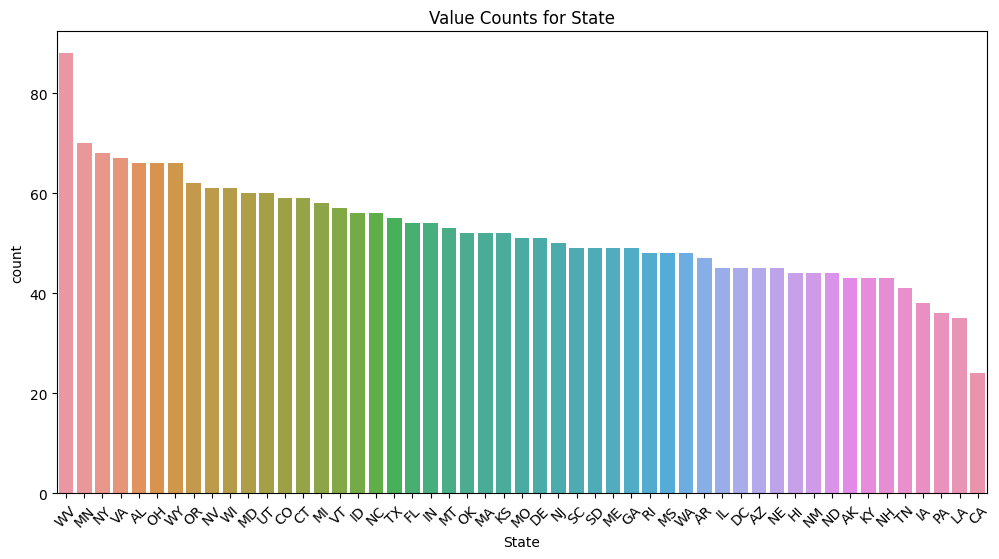

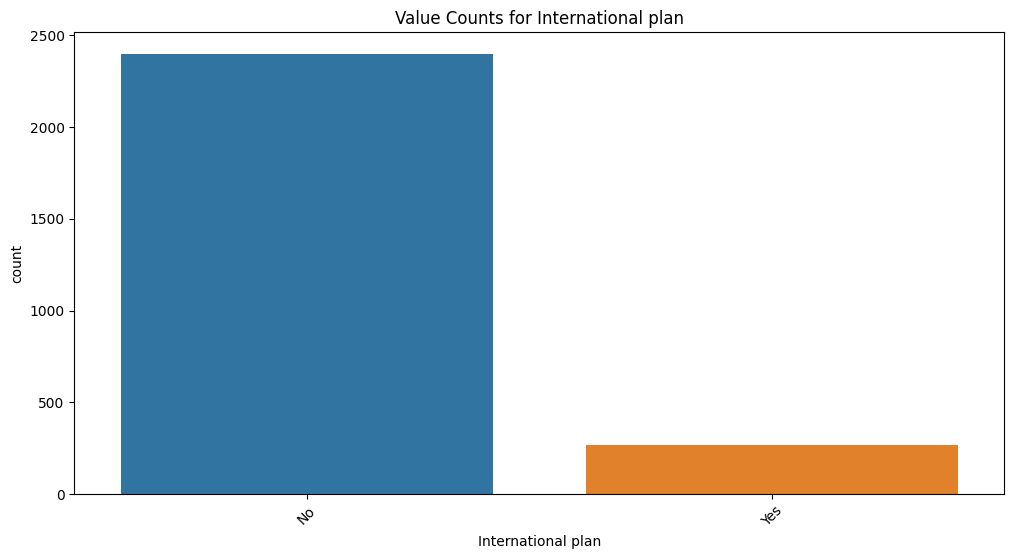

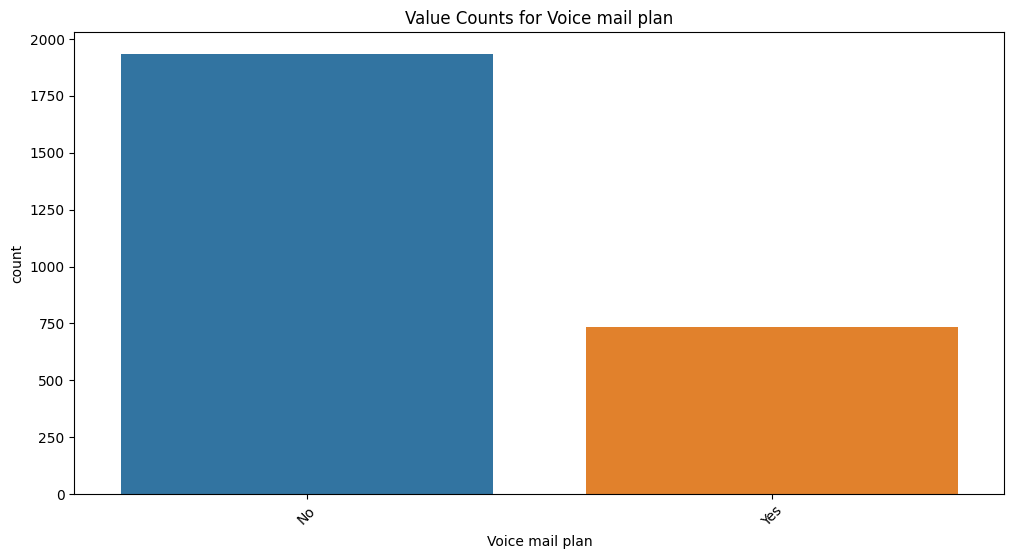

In [410]:
# Categorical value counts
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index)
    plt.title(f'Value Counts for {col}')
    plt.xticks(rotation=45)
    plt.show()

### Visuals of Numerical columns:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


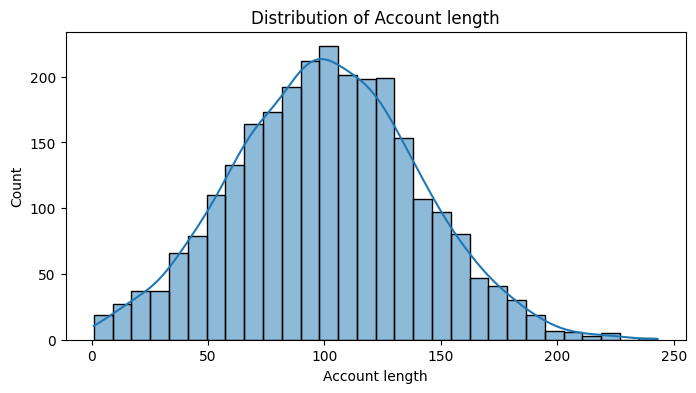

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


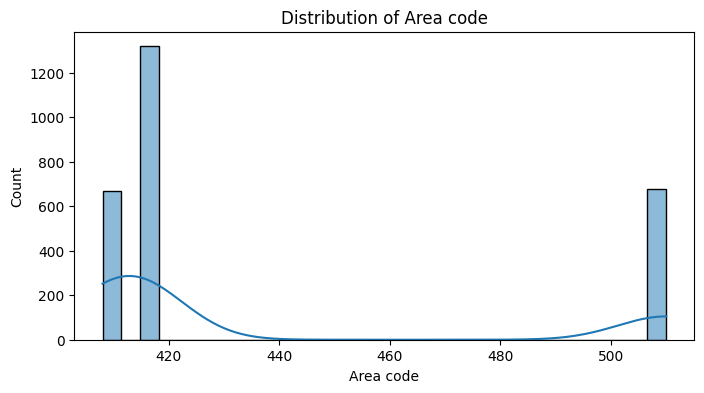

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


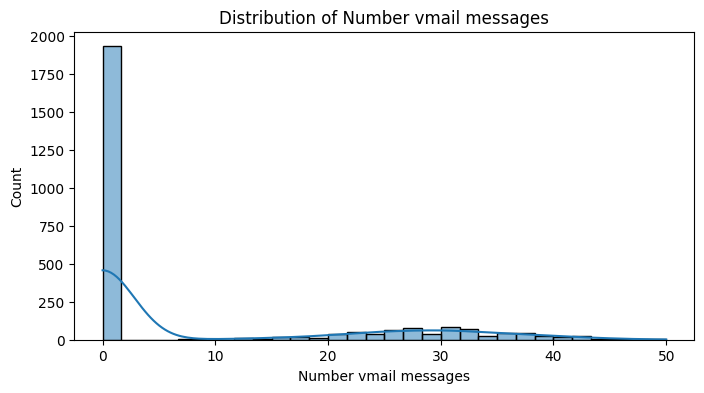

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


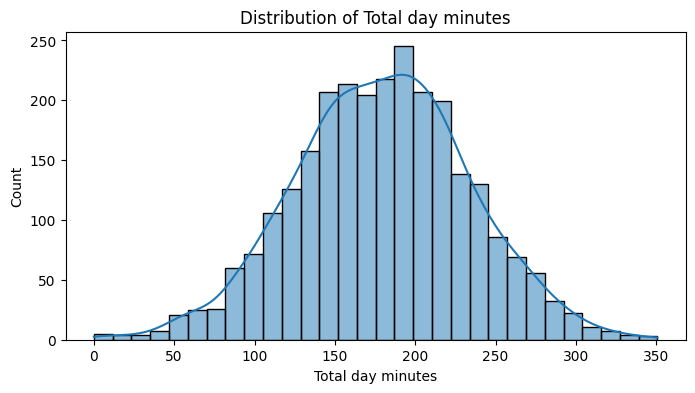

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


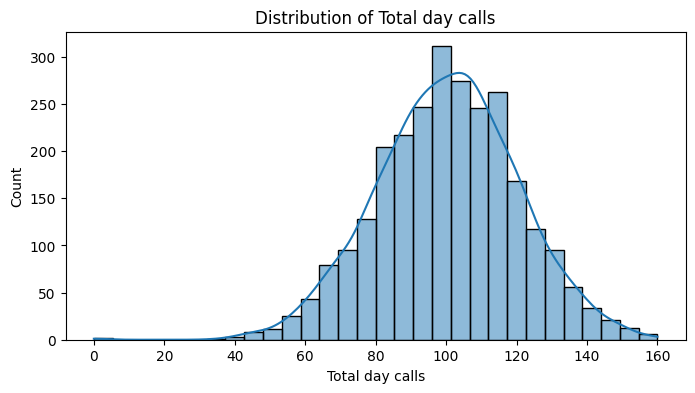

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


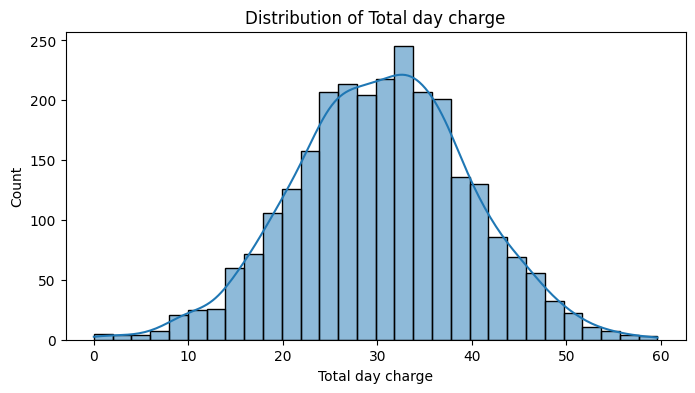

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


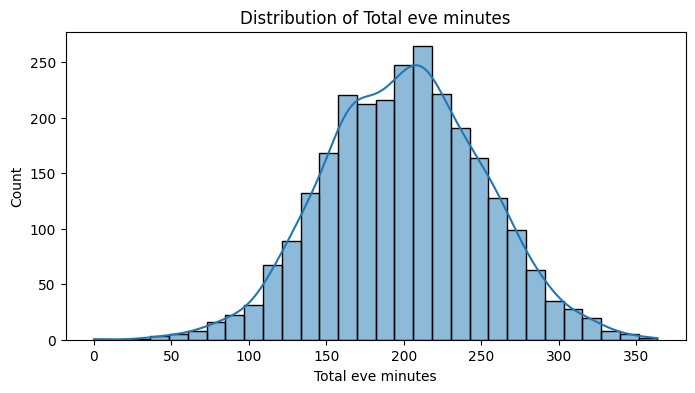

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


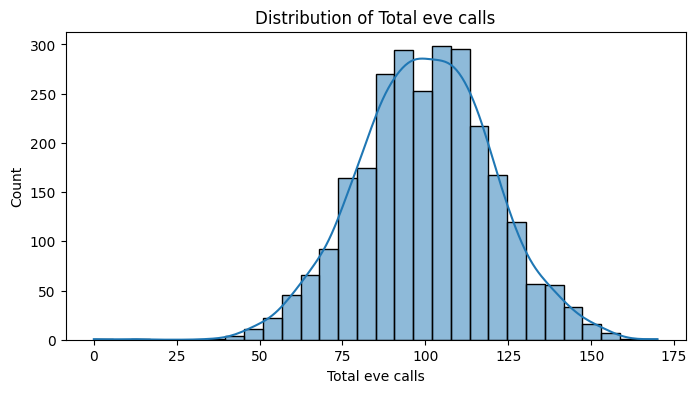

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


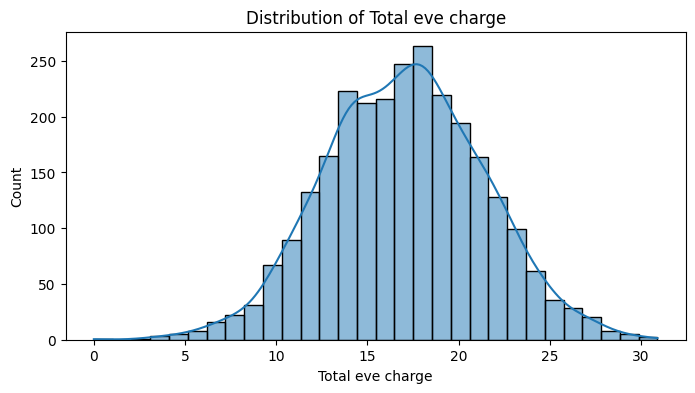

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


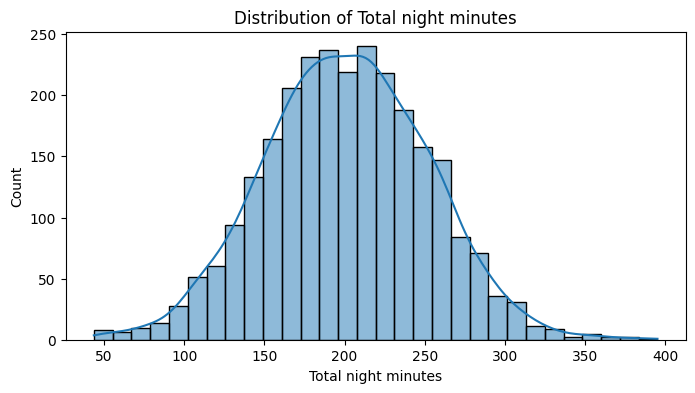

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


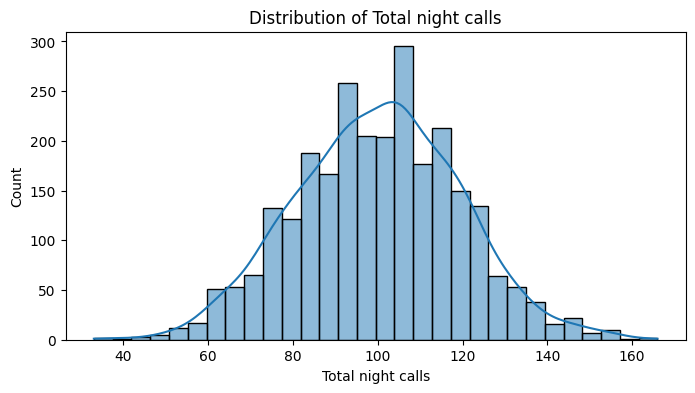

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


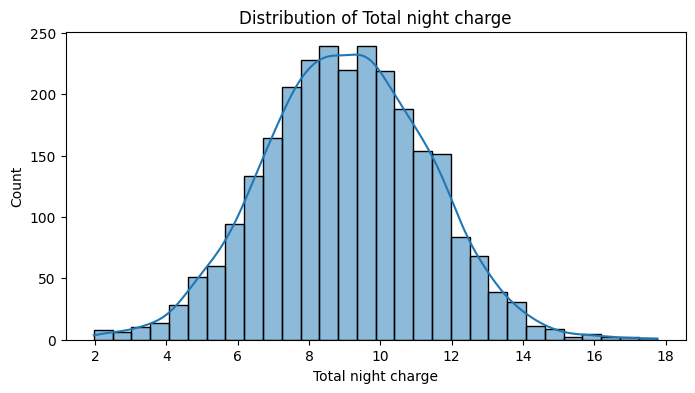

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


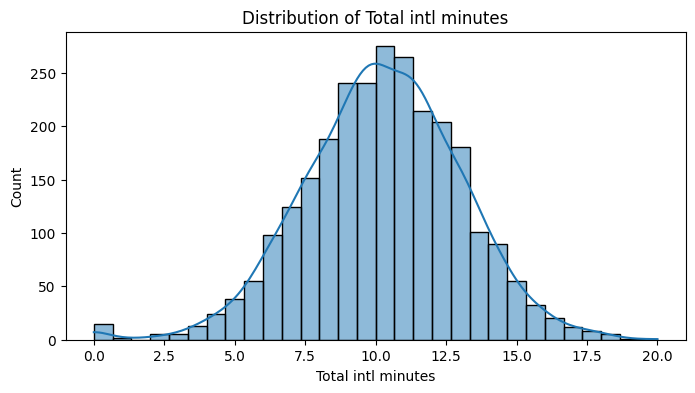

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


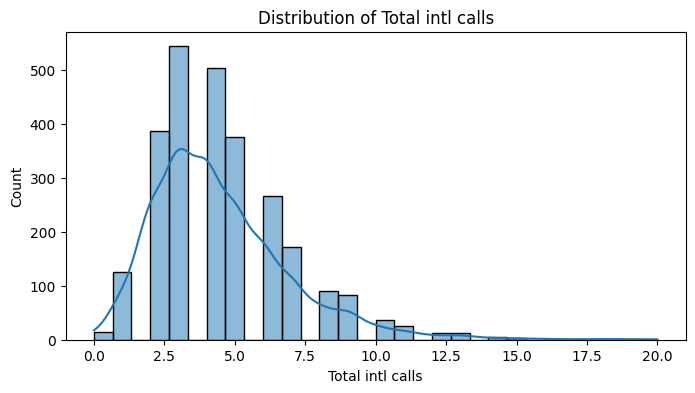

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


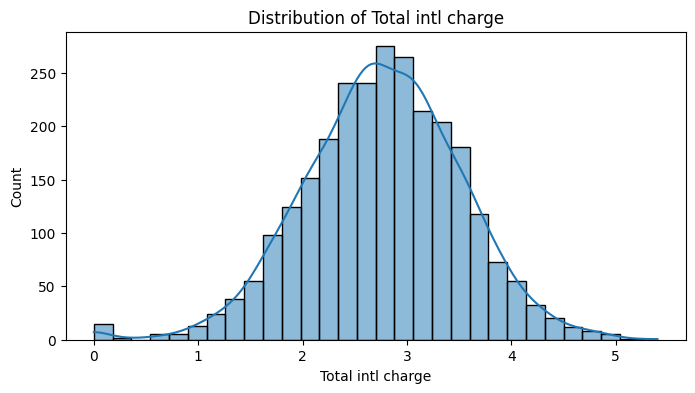

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


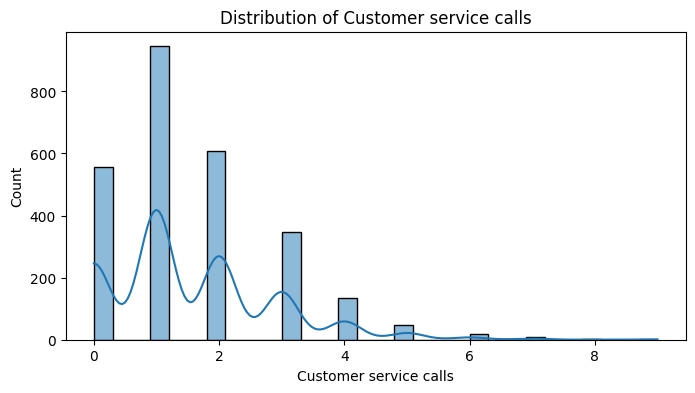

In [411]:
# Distribution of numeric columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

### Checking Missing Values 

In [412]:

# Cell 5: Check missing values
print("\nMissing Values in Training Set:")
print(df_train.isnull().sum()[df_train.isnull().sum() > 0])
print("\nMissing Values in Test Set:")
print(df_test.isnull().sum()[df_test.isnull().sum() > 0])


Missing Values in Training Set:
Series([], dtype: int64)

Missing Values in Test Set:
Series([], dtype: int64)


# 🔄 Data Transformation Pipeline
---
### Steps:
1. **Categorical Encoding**
   - Convert text categories to numeric values
   - Preserve encoding mappings for future use

2. **Numeric Processing**
   - Log transform skewed features
   - Scale numeric columns
   - Handle outliers systematically

3. **Quality Assurance**
   - Verify transformations
   - Check for data integrity

In [413]:
# Cell 6: Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Create copies for encoding
df_train_encoded = df_train.copy()
df_test_encoded = df_test.copy()


In [414]:
# Encode each categorical column
le_dict = {}
for column in categorical_columns:
    le = LabelEncoder()
    # Fit on training data
    df_train_encoded[column] = le.fit_transform(df_train[column])
    # Use same encoding for test data
    df_test_encoded[column] = le.transform(df_test[column])
    le_dict[column] = le


In [415]:
# Print encoding mappings
print("\nEncoding mappings:")
print("-" * 50)
for column in categorical_columns:
    print(f"\n{column}:")
    for i, label in enumerate(le_dict[column].classes_):
        print(f"{label} -> {i}")



Encoding mappings:
--------------------------------------------------

State:
AK -> 0
AL -> 1
AR -> 2
AZ -> 3
CA -> 4
CO -> 5
CT -> 6
DC -> 7
DE -> 8
FL -> 9
GA -> 10
HI -> 11
IA -> 12
ID -> 13
IL -> 14
IN -> 15
KS -> 16
KY -> 17
LA -> 18
MA -> 19
MD -> 20
ME -> 21
MI -> 22
MN -> 23
MO -> 24
MS -> 25
MT -> 26
NC -> 27
ND -> 28
NE -> 29
NH -> 30
NJ -> 31
NM -> 32
NV -> 33
NY -> 34
OH -> 35
OK -> 36
OR -> 37
PA -> 38
RI -> 39
SC -> 40
SD -> 41
TN -> 42
TX -> 43
UT -> 44
VA -> 45
VT -> 46
WA -> 47
WI -> 48
WV -> 49
WY -> 50

International plan:
No -> 0
Yes -> 1

Voice mail plan:
No -> 0
Yes -> 1


In [416]:
columns_to_exclude = ['churn', 'State', 'International plan', 'Voice mail plan', 'Area code','Customer service calls']
numeric_columns = [col for col in numeric_columns if col not in columns_to_exclude]

In [417]:
# : Initialize clean datasets and apply log transform to intl calls
df_train_clean = df_train_encoded.copy()
df_test_clean = df_test_encoded.copy()

### 📊 International Calls Transformation

In [418]:
# Special handling for international calls
df_train_clean['Total intl calls'] = np.log1p(df_train_clean['Total intl calls'])
df_test_clean['Total intl calls'] = np.log1p(df_test_clean['Total intl calls'])


##### Why we use log transformation for international calls:

1. **Data Distribution**
   - International calls typically show a right-skewed distribution
   - Many customers make few international calls
   - A small number of customers make many calls
   - This creates a long tail in the distribution

2. **Why np.log1p() specifically?**
   - log1p(x) = log(1 + x)
   - The '1p' means "plus 1"
   - We use this instead of regular log because:
     - It safely handles zero values (log(0) is undefined)
     - Many customers have 0 international calls
     - log1p(0) = 0, preserving the meaning of no calls

3. **Benefits of this transformation**
   - Makes the distribution more normal (bell-shaped)
   - Reduces the impact of extreme values
   - Improves model performance
   - Maintains interpretability of zero values

4. **Example of the effect:**
   Original: [0, 1, 5, 20, 100]
   After log1p: [0, 0.69, 1.79, 3.04, 4.61]

### Scaling the data :

In [419]:
# Scale the data
scaler = StandardScaler()
for column in numeric_columns:
    df_train_clean[column] = scaler.fit_transform(df_train_clean[[column]])
    df_test_clean[column] = scaler.transform(df_test_clean[[column]])

    print(f"\nColumn: {column}")
    print(f"Original range: [{df_train[column].min():.2f}, {df_train[column].max():.2f}]")
    print(f"Scaled range before outlier detection: [{df_train_clean[column].min():.2f}, {df_train_clean[column].max():.2f}]")


Column: Account length
Original range: [1.00, 243.00]
Scaled range before outlier detection: [-2.52, 3.60]

Column: Number vmail messages
Original range: [0.00, 50.00]
Scaled range before outlier detection: [-0.59, 3.08]

Column: Total day minutes
Original range: [0.00, 350.80]
Scaled range before outlier detection: [-3.31, 3.16]

Column: Total day calls
Original range: [0.00, 160.00]
Scaled range before outlier detection: [-5.02, 2.99]

Column: Total day charge
Original range: [0.00, 59.64]
Scaled range before outlier detection: [-3.31, 3.16]

Column: Total eve minutes
Original range: [0.00, 363.70]
Scaled range before outlier detection: [-3.93, 3.21]

Column: Total eve calls
Original range: [0.00, 170.00]
Scaled range before outlier detection: [-4.96, 3.47]

Column: Total eve charge
Original range: [0.00, 30.91]
Scaled range before outlier detection: [-3.93, 3.20]

Column: Total night minutes
Original range: [43.70, 395.00]
Scaled range before outlier detection: [-3.10, 3.82]

Colum

# 📊 Outlier Analysis + Treatement

In [420]:
# Store outlier counts
outliers_before = {'train': 0, 'test': 0}
outliers_after = {'train': 0, 'test': 0}


## 🛠️ IQR Method Used

### Process:
1. Calculate IQR boundaries for each feature
2. Identify outliers using 1.5 × IQR rule
3. Handle outliers while preserving important signals
4. Document remaining outliers for transparency

### Note:
Special attention given to Customer Service Calls feature due to its unique distribution.

In [421]:
for column in numeric_columns:
    # Calculate bounds from scaled training data
    Q1 = df_train_clean[column].quantile(0.25)
    Q3 = df_train_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers before cleaning
    train_outliers_lower = sum(df_train_clean[column] < lower_bound)
    train_outliers_upper = sum(df_train_clean[column] > upper_bound)
    test_outliers_lower = sum(df_test_clean[column] < lower_bound)
    test_outliers_upper = sum(df_test_clean[column] > upper_bound)

    outliers_before['train'] += train_outliers_lower + train_outliers_upper
    outliers_before['test'] += test_outliers_lower + test_outliers_upper

    # Handle outliers for lower bounds 
    df_train_clean = df_train_clean[df_train_clean[column] >= lower_bound]  # Remove lower outliers
    df_test_clean = df_test_clean[df_test_clean[column] >= lower_bound]    # Remove lower outliers

    # Leave higher outliers as they are relevent data
    # Optionally, print the outliers
    print(f"Number of lower outliers removed from training set: {train_outliers_lower}")
    print(f"Number of higher outliers retained in training set: {train_outliers_upper}")
    print(f"Outlier bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")


Number of lower outliers removed from training set: 0
Number of higher outliers retained in training set: 12
Outlier bounds: [-2.75, 2.71]
Number of lower outliers removed from training set: 0
Number of higher outliers retained in training set: 2
Outlier bounds: [-2.68, 2.90]
Number of lower outliers removed from training set: 13
Number of higher outliers retained in training set: 8
Outlier bounds: [-2.67, 2.68]
Number of lower outliers removed from training set: 10
Number of higher outliers retained in training set: 6
Outlier bounds: [-2.69, 2.71]
Number of lower outliers removed from training set: 0
Number of higher outliers retained in training set: 8
Outlier bounds: [-2.66, 2.67]
Number of lower outliers removed from training set: 10
Number of higher outliers retained in training set: 7
Outlier bounds: [-2.74, 2.74]
Number of lower outliers removed from training set: 8
Number of higher outliers retained in training set: 6
Outlier bounds: [-2.66, 2.70]
Number of lower outliers remov

### Why Was Customer Service Calls not included in outlier detection and handling ?
---
#### Distribution Characteristics:
- Range typically: 0-9 calls
- Most customers: 0-2 calls 
- Higher calls (3+) strongly correlate with churn
- Not a continuous variable like minutes/charges

#### Why Standard Outlier Removal Isn't Appropriate:
1. Business Significance:
   - High number of service calls often directly indicates customer dissatisfaction
   - Key predictor of customer churn behavior
   - Each call represents a discrete customer interaction

2. Statistical Nature:
   - Count data (discrete integers) vs continuous values
   - Right-skewed but naturally expected distribution
   - "Outliers" here are actually crucial signal, not noise


  
   - Removing "outliers" would eliminate important churn indicators
  


Churn Rate by Number of Service Calls:
Churn                   Total Customers  Churn Rate
Customer service calls                             
0                                   555   14.234234
1                                   945   10.476190
2                                   608   10.197368
3                                   348   10.632184
4                                   133   48.120301
5                                    49   59.183673
6                                    17   58.823529
7                                     8   62.500000
8                                     1  100.000000
9                                     2  100.000000


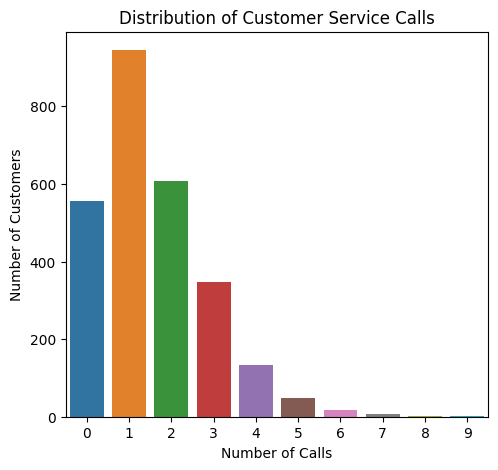

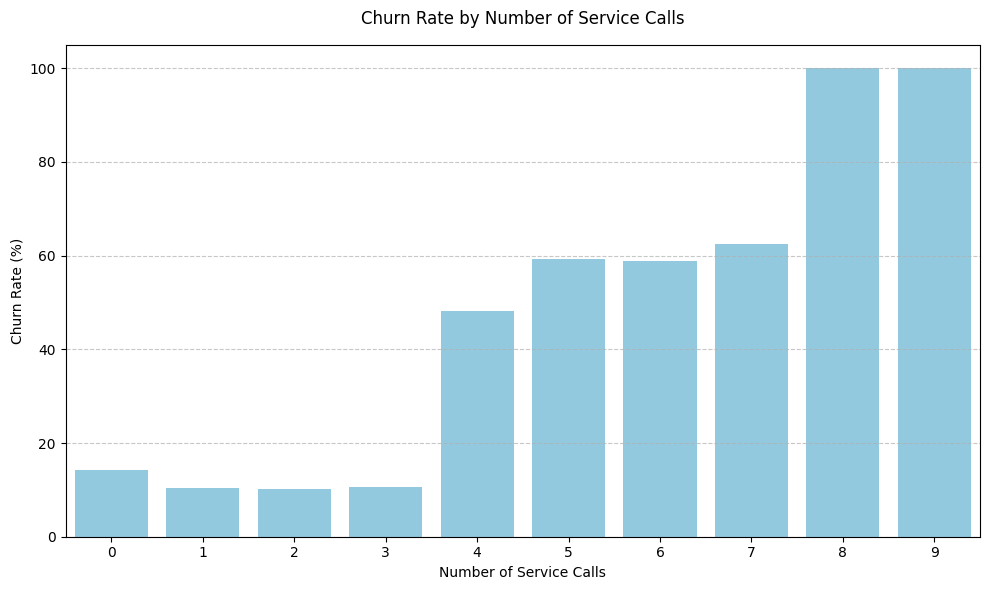

In [422]:
# Get churn rates by number of calls
churn_by_calls = df_train.groupby('Customer service calls')['Churn'].value_counts(normalize=True).unstack()
churn_by_calls = churn_by_calls.fillna(0)
churn_by_calls['Total Customers'] = df_train.groupby('Customer service calls').size()
churn_by_calls['Churn Rate'] = churn_by_calls[True] * 100 if True in churn_by_calls.columns else churn_by_calls['True'] * 100

print("\nChurn Rate by Number of Service Calls:")
print(churn_by_calls[['Total Customers', 'Churn Rate']])

# Plotting
plt.figure(figsize=(12, 5))

# Distribution plot
plt.subplot(1, 2, 1)
sns.countplot(data=df_train, x='Customer service calls')
plt.title('Distribution of Customer Service Calls')
plt.xlabel('Number of Calls')
plt.ylabel('Number of Customers')

# Churn rate plot
# Create dataframe for plotting
churn_data = pd.DataFrame({
    'Calls': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Churn_Rate': [14.23, 10.48, 10.20, 10.63, 48.12, 59.18, 58.82, 62.50, 100.0, 100.0]
})

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_data, x='Calls', y='Churn_Rate', color='skyblue')

# Customize the plot
plt.title('Churn Rate by Number of Service Calls', pad=15)
plt.xlabel('Number of Service Calls')
plt.ylabel('Churn Rate (%)')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

In [423]:
#  Apply KNN imputation
imputer = KNNImputer(n_neighbors=5)
df_train_clean[numeric_columns] = imputer.fit_transform(df_train_clean[numeric_columns])
df_test_clean[numeric_columns] = imputer.transform(df_test_clean[numeric_columns])


### Why KNN Imputation ?
---
- Preserves relationships between features by using similar records
- More sophisticated than mean/median imputation
- Good for telecom data where customer patterns may be similar
- Uses 5 nearest neighbors to estimate missing values

In [424]:
#  Check remaining outliers and create visualizations (optional but can help see changes for before and after imputation)
def check_remaining_outliers(df_clean, numeric_columns):
    remaining_outliers = {}
    for column in numeric_columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = sum((df_clean[column] < lower_bound) | (df_clean[column] > upper_bound))
        remaining_outliers[column] = outliers
    return remaining_outliers

In [425]:
# Check and print remaining outliers
remaining_outliers = check_remaining_outliers(df_train_clean, numeric_columns)
print("\nRemaining Outliers After Processing:")
print("-" * 50)
for column, count in remaining_outliers.items():
    print(f"{column}: {count} outliers")


Remaining Outliers After Processing:
--------------------------------------------------
Account length: 11 outliers
Number vmail messages: 2 outliers
Total day minutes: 8 outliers
Total day calls: 5 outliers
Total day charge: 8 outliers
Total eve minutes: 8 outliers
Total eve calls: 6 outliers
Total eve charge: 8 outliers
Total night minutes: 12 outliers
Total night calls: 11 outliers
Total night charge: 12 outliers
Total intl minutes: 12 outliers
Total intl calls: 7 outliers
Total intl charge: 15 outliers


In [426]:
#  Print final summary
print("\nFinal Summary:")
print("-" * 50)
for column in numeric_columns:
    print(f"\nColumn: {column}")
    print(f"Final range after all processing: [{df_train_clean[column].min():.2f}, {df_train_clean[column].max():.2f}]")


Final Summary:
--------------------------------------------------

Column: Account length
Final range after all processing: [-2.52, 3.60]

Column: Number vmail messages
Final range after all processing: [-0.59, 3.08]

Column: Total day minutes
Final range after all processing: [-2.62, 3.16]

Column: Total day calls
Final range after all processing: [-2.67, 2.99]

Column: Total day charge
Final range after all processing: [-2.62, 3.16]

Column: Total eve minutes
Final range after all processing: [-2.72, 3.21]

Column: Total eve calls
Final range after all processing: [-2.58, 3.47]

Column: Total eve charge
Final range after all processing: [-2.72, 3.20]

Column: Total night minutes
Final range after all processing: [-2.72, 3.82]

Column: Total night calls
Final range after all processing: [-2.68, 3.39]

Column: Total night charge
Final range after all processing: [-2.71, 3.82]

Column: Total intl minutes
Final range after all processing: [-2.49, 3.50]

Column: Total intl calls
Final ra

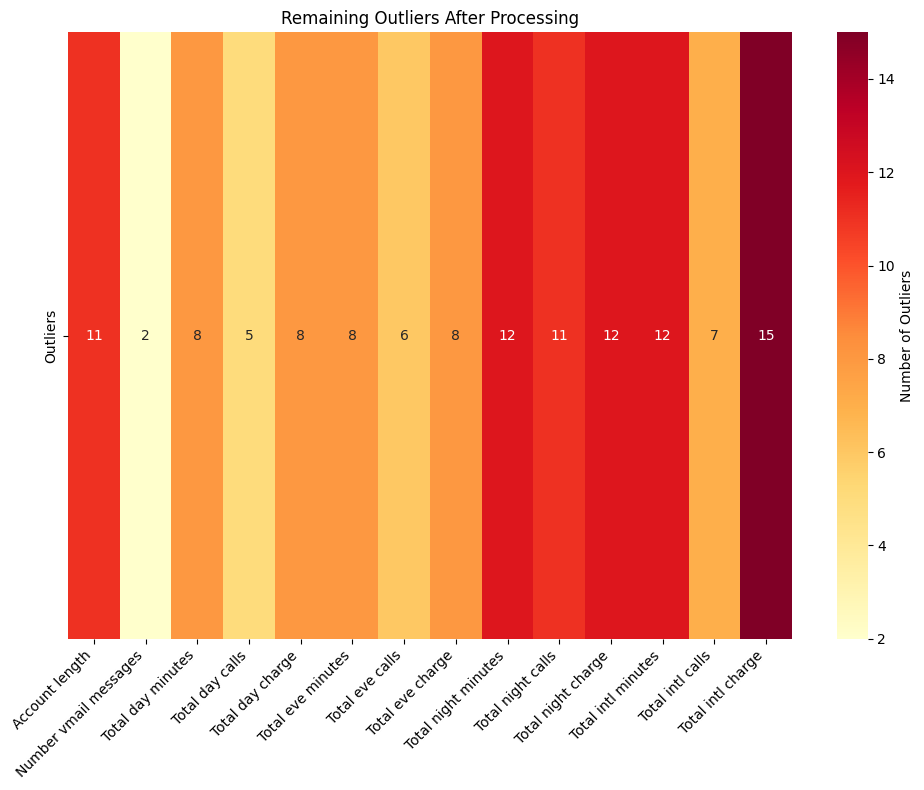

In [427]:
# Create dataframe for outliers
outliers_data = pd.DataFrame({
    'Feature': [
        'Account length', 'Number vmail messages', 'Total day minutes',
        'Total day calls', 'Total day charge', 'Total eve minutes',
        'Total eve calls', 'Total eve charge', 'Total night minutes',
        'Total night calls', 'Total night charge', 'Total intl minutes',
        'Total intl calls', 'Total intl charge'
    ],
    'Remaining_Outliers': [
        11, 2, 8, 5, 8, 8, 6, 8, 12, 11, 12, 12, 7, 15
    ]
})

# Reshape data for heatmap
outliers_matrix = outliers_data.set_index('Feature')['Remaining_Outliers'].values.reshape(-1, 1)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(outliers_matrix.T,
            xticklabels=outliers_data['Feature'],
            yticklabels=['Outliers'],
            cmap='YlOrRd',
            annot=True,
            fmt='g',
            cbar_kws={'label': 'Number of Outliers'})

plt.xticks(rotation=45, ha='right')
plt.title('Remaining Outliers After Processing')
plt.tight_layout()
plt.show()

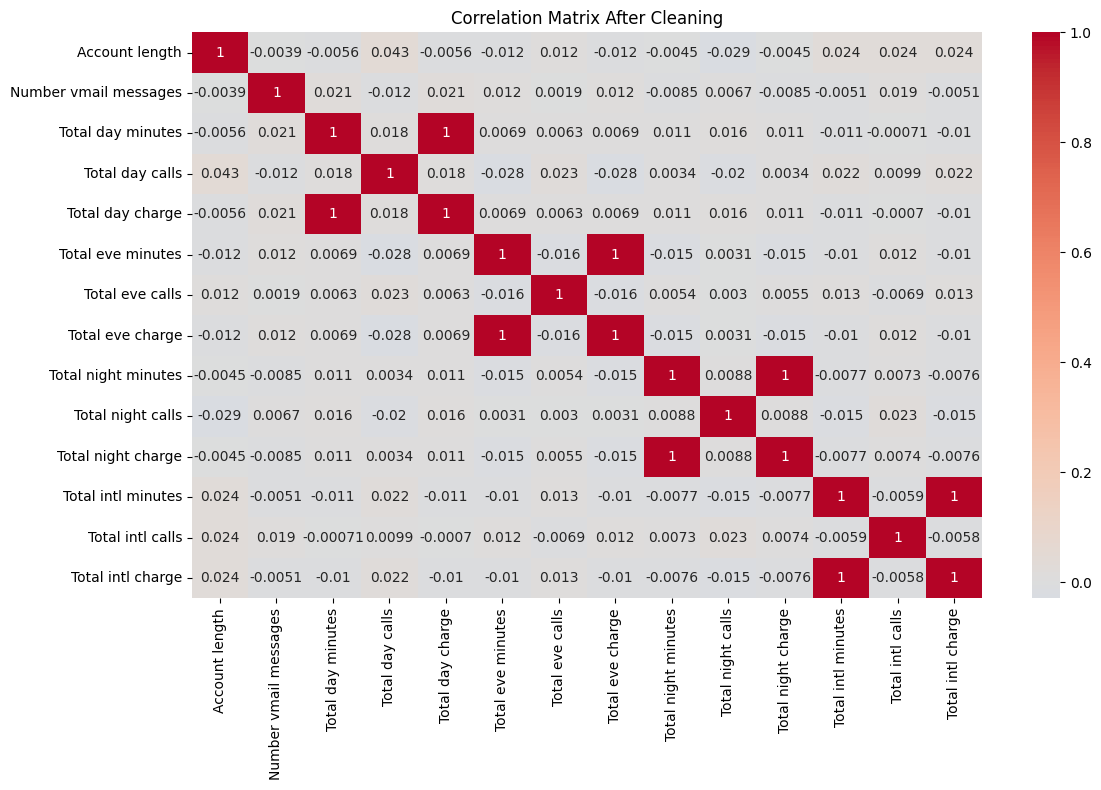

In [428]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train_clean[numeric_columns].corr(),
            annot=True,
            cmap='coolwarm',
            center=0)
plt.title('Correlation Matrix After Cleaning')
plt.tight_layout()
plt.show()

In [429]:
# Drop the charge columns since they're perfectly correlated with minutes
columns_to_drop = [
    'Total day charge',
    'Total eve charge',
    'Total night charge',
    'Total intl charge'
]

df_train_clean = df_train_clean.drop(columns=columns_to_drop)
df_test_clean = df_test_clean.drop(columns=columns_to_drop)

print("Remaining columns:", df_train_clean.columns.tolist())

Remaining columns: ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total eve minutes', 'Total eve calls', 'Total night minutes', 'Total night calls', 'Total intl minutes', 'Total intl calls', 'Customer service calls', 'Churn']


## ⚖️ Churn Imbalance
chosen method is:  
### NearMiss
1. Undersamples majority class (non-churners) instead of creating synthetic churners
2. Creates perfect 1:1 ratio while keeping all minority samples
3. Preserves real churn patterns

#### Why was SMOTE/ADASYN not used?
1. Not ideal for telecom where churn patterns are specific and non-random
2. Creates too many synthetic samples (Churn Ratio: 1.030 for ADASYN ,Churn Ratio: 1.030 for SMOTEENN ) thus Creates unrealistic class distribution
   
#### Why was Class Weights not used?
class weights do not modify the dataset. Instead, they influence the training process to make the model more sensitive to the minority class. but recall overall was still low although a high precision . Despite class weighting, there's still some bias toward the majority class

###### Implementation Note
1. Applied only to training data
2. Test data remains untouched to maintain evaluation integrity

In [430]:
# Import required library
from imblearn.under_sampling import NearMiss

# Apply NearMiss only to training data
nearmiss = NearMiss(version=3)
X_train_balanced, y_train_balanced = nearmiss.fit_resample(X_train, y_train)

# Print class distributions before and after balancing
print("Original training set distribution:")
print(pd.Series(y_train).value_counts())
print("\nBalanced training set distribution:")
print(pd.Series(y_train_balanced).value_counts())

# Save balanced training data
# Keep test data in original form - never balance test data
X_train_final = pd.DataFrame(X_train_balanced, columns=X_train.columns)
y_train_final = pd.Series(y_train_balanced)

print("\nFinal shapes:")
print(f"X_train_balanced: {X_train_final.shape}")
print(f"y_train_balanced: {y_train_final.shape}")
print(f"X_test (unchanged): {X_test.shape}")
print(f"y_test (unchanged): {y_test.shape}")

Original training set distribution:
Churn
False    2202
True      382
Name: count, dtype: int64

Balanced training set distribution:
Churn
False    382
True     382
Name: count, dtype: int64

Final shapes:
X_train_balanced: (764, 15)
y_train_balanced: (764,)
X_test (unchanged): (647, 15)
y_test (unchanged): (647,)


# ⚡ Feature Engineering & Selection
---
### Methodology:
1. Calculate Mutual Information scores (or test with shap values)
2. Identify key predictive feaures
3. Select optimal feature subsets
4. Validate feature importance

In [431]:
# Prepare features and target variables after applying NearMiss
X_train_final = pd.DataFrame(X_train_balanced, columns=X_train.columns) 
y_train_final = pd.Series(y_train_balanced) 

## MI Method (purely statistical)

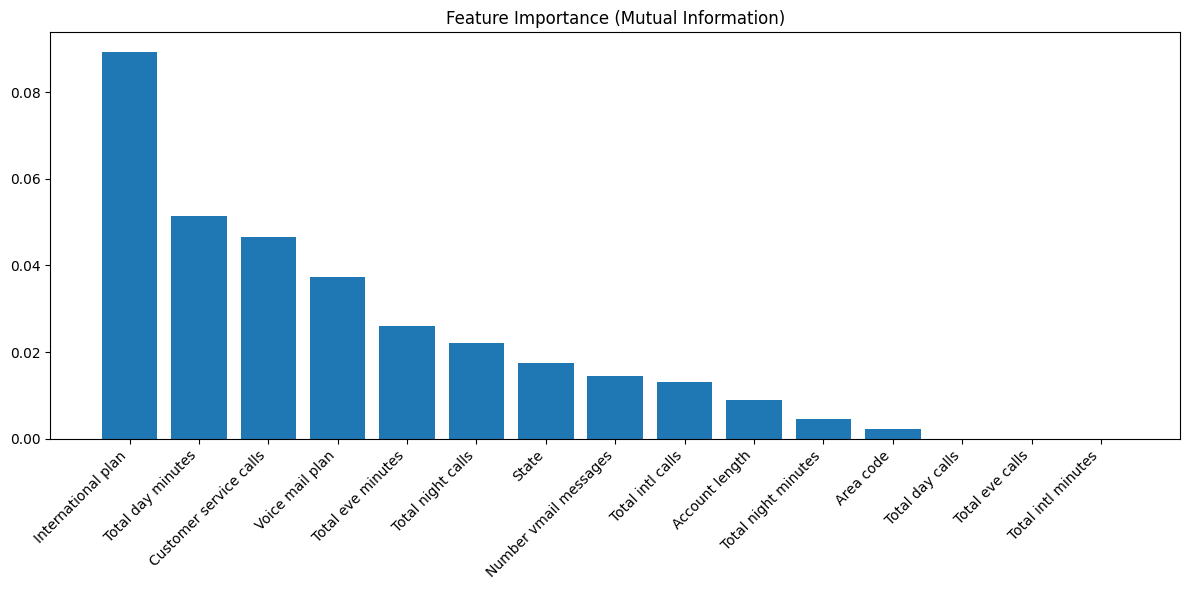


Feature Importance Scores:
                   Feature  MI Score
3       International plan  0.089316
6        Total day minutes  0.051323
14  Customer service calls  0.046446
4          Voice mail plan  0.037283
8        Total eve minutes  0.026076
11       Total night calls  0.022193
0                    State  0.017578
5    Number vmail messages  0.014594
13        Total intl calls  0.013118
1           Account length  0.008858
10     Total night minutes  0.004618
2                Area code  0.002207
7          Total day calls  0.000000
9          Total eve calls  0.000000
12      Total intl minutes  0.000000

Top features explaining 80% of the variation:
                   Feature  MI Score  Importance_Proportion  \
3       International plan  0.089316               0.267727   
6        Total day minutes  0.051323               0.153841   
14  Customer service calls  0.046446               0.139223   
4          Voice mail plan  0.037283               0.111757   
8        Total eve

In [432]:
# Calculate mutual information scores using the balanced training data
mi_scores = mutual_info_classif(X_train_balanced, y_train_balanced)

# Create and sort feature importance dataframe
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'MI Score': mi_scores
}).sort_values('MI Score', ascending=False)

# Visualize
plt.figure(figsize=(12, 6))
plt.bar(feature_importance['Feature'], feature_importance['MI Score'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance (Mutual Information)')
plt.tight_layout()
plt.show()

print("\nFeature Importance Scores:")
print(feature_importance)

# Calculate and print proportion of importance
feature_importance['Importance_Proportion'] = feature_importance['MI Score'] / feature_importance['MI Score'].sum()
feature_importance['Cumulative_Importance'] = feature_importance['Importance_Proportion'].cumsum()

# Print top features explaining 80% of the variation
print("\nTop features explaining 80% of the variation:")
print(feature_importance[feature_importance['Cumulative_Importance'] <= 0.8])


                   Feature  Original Data Importance  \
6        Total day minutes                  0.247087   
14  Customer service calls                  0.138232   
3       International plan                  0.104491   
8        Total eve minutes                  0.080686   
12      Total intl minutes                  0.075551   
13        Total intl calls                  0.060633   
10     Total night minutes                  0.049060   
11       Total night calls                  0.040724   
1           Account length                  0.039457   
7          Total day calls                  0.038712   
9          Total eve calls                  0.038215   
0                    State                  0.034589   
5    Number vmail messages                  0.025963   
4          Voice mail plan                  0.015751   
2                Area code                  0.010848   

    Undersampled Data Importance  
6                       0.220951  
14                      0.120287 

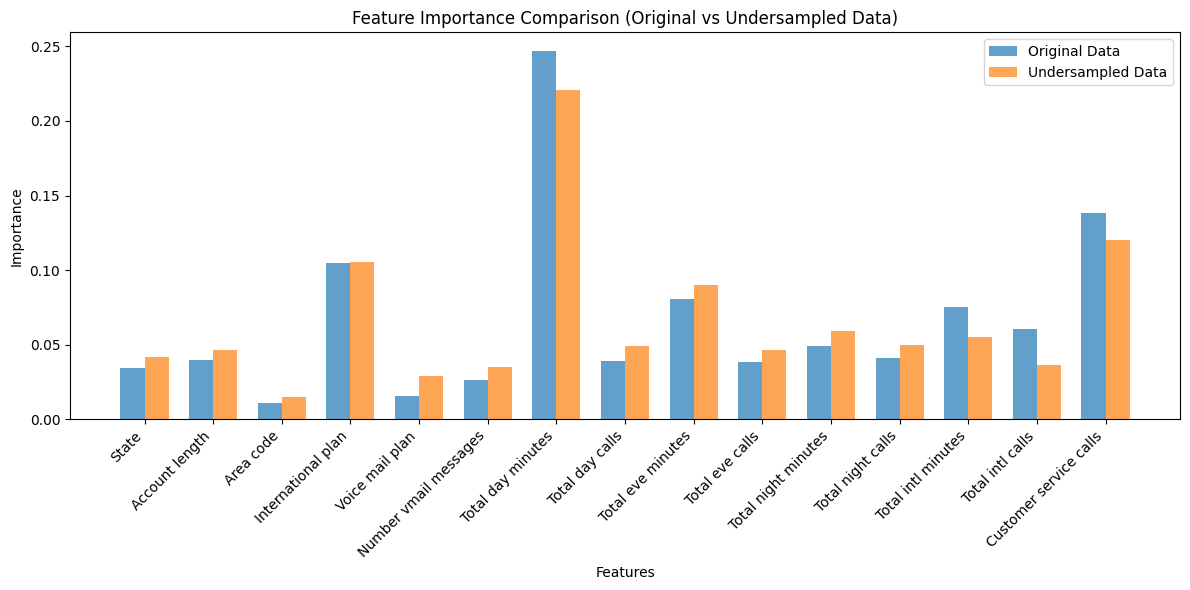

In [433]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest on the original data
rf_original = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_original.fit(X_train, y_train)
original_importance = rf_original.feature_importances_

# Train Random Forest on the undersampled data
rf_undersampled = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_undersampled.fit(X_train_balanced, y_train_balanced)
undersampled_importance = rf_undersampled.feature_importances_

# Convert feature importances into a DataFrame for easy comparison
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Original Data Importance': original_importance,
    'Undersampled Data Importance': undersampled_importance
}).sort_values(by='Original Data Importance', ascending=False)

# Display the feature importance values
print(importance_df)

# Plot the feature importance comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(X_train.columns))
width = 0.35

plt.bar(x - width / 2, original_importance, width, label='Original Data', alpha=0.7)
plt.bar(x + width / 2, undersampled_importance, width, label='Undersampled Data', alpha=0.7)

plt.xticks(x, X_train.columns, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Comparison (Original vs Undersampled Data)')
plt.legend()
plt.tight_layout()
plt.show()


## SHAP Method (based on Random Forest decisions)
shap --> SHapley Additive exPlanations
### The advantage of SHAP values over mutual information is that they:

SHAP values show how each feature affects each final prediction, the significance of each feature compared to others, and the model's reliance on the interaction between features.

##### Important
diff models showed same selected features to include in modeling phase with a slight change in feature importance rank which is not as important as knowing which features are important or not

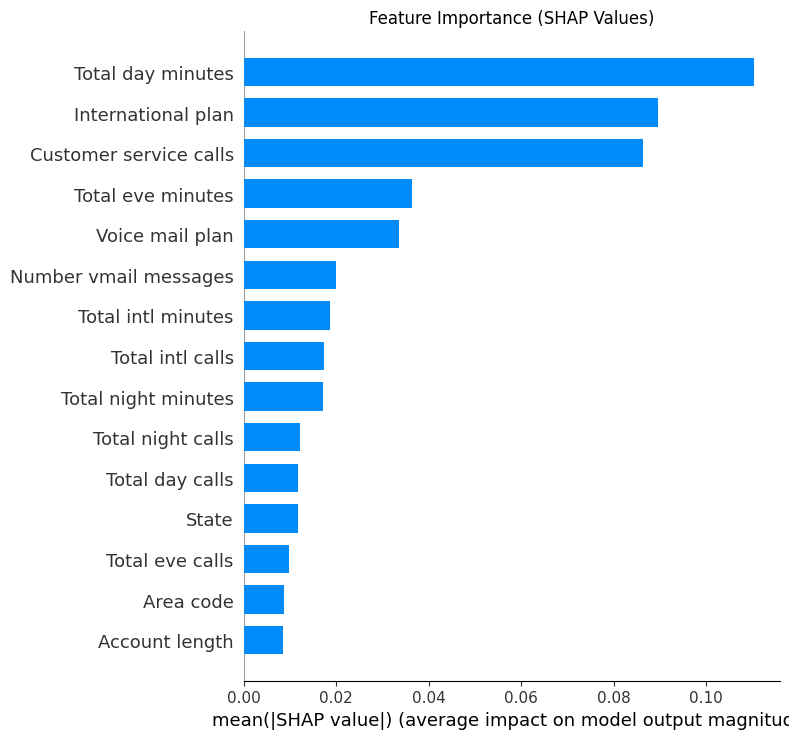


Feature Importance (SHAP Values):
                   Feature  SHAP_Value  Importance_Proportion  \
6        Total day minutes    0.110456               0.224276   
3       International plan    0.089584               0.181896   
14  Customer service calls    0.086324               0.175278   
8        Total eve minutes    0.036429               0.073967   
4          Voice mail plan    0.033552               0.068125   
5    Number vmail messages    0.020086               0.040784   
12      Total intl minutes    0.018693               0.037956   
13        Total intl calls    0.017367               0.035262   
10     Total night minutes    0.017179               0.034881   
11       Total night calls    0.012175               0.024721   
7          Total day calls    0.011854               0.024070   
0                    State    0.011845               0.024051   
9          Total eve calls    0.009802               0.019902   
2                Area code    0.008638               0.

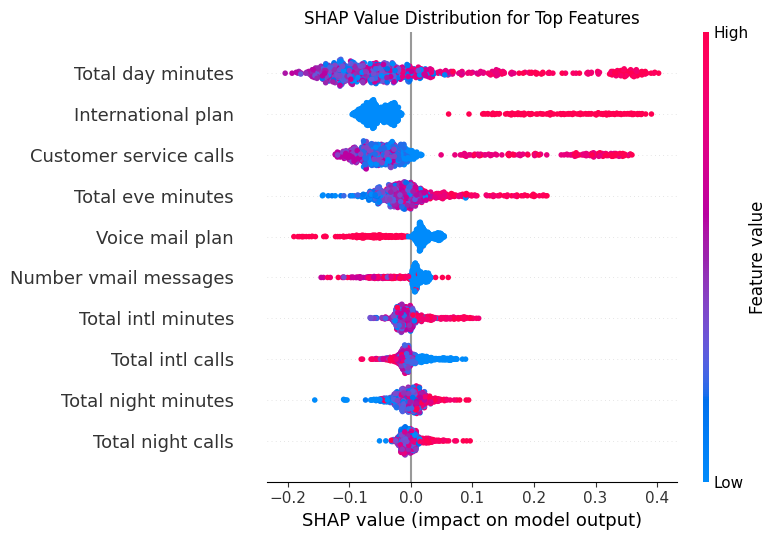

<Figure size 1000x600 with 0 Axes>

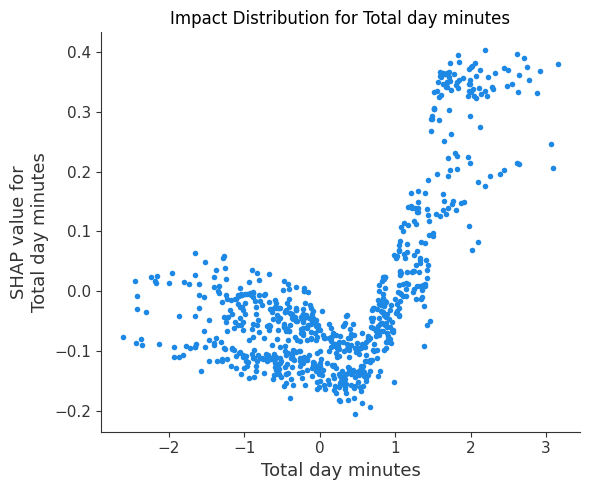

In [434]:

# Train a smaller Random Forest model on balanced data
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Take a smaller sample for SHAP analysis
SAMPLE_SIZE = 1000
sample_indices = np.random.choice(range(len(X_train_balanced)), size=min(SAMPLE_SIZE, len(X_train_balanced)), replace=False)
X_sample = X_train_balanced.iloc[sample_indices].copy()

# Calculate SHAP values with the sampled data
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_sample)

# Summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values[1], X_sample, plot_type="bar", show=False)
plt.title('Feature Importance (SHAP Values)')
plt.tight_layout()
plt.show()

# Calculate mean absolute SHAP values for each feature
shap_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'SHAP_Value': np.abs(shap_values[1]).mean(0)
}).sort_values('SHAP_Value', ascending=False)

# Calculate proportion and cumulative importance
total_shap = shap_importance['SHAP_Value'].sum()
shap_importance['Importance_Proportion'] = shap_importance['SHAP_Value'] / total_shap
shap_importance['Cumulative_Importance'] = shap_importance['Importance_Proportion'].cumsum()

print("\nFeature Importance (SHAP Values):")
print(shap_importance)

print("\nTop features explaining 80% of the impact:")
print(shap_importance[shap_importance['Cumulative_Importance'] <= 0.8])

# Detailed SHAP value plot for top features
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values[1], X_sample, max_display=10, show=False)
plt.title('SHAP Value Distribution for Top Features')
plt.tight_layout()
plt.show()

# Top feature impact distribution
most_important_feature = shap_importance['Feature'].iloc[0]
plt.figure(figsize=(10, 6))
shap.dependence_plot(
    most_important_feature, 
    shap_values[1], 
    X_sample,
    interaction_index=None,
    show=False
)
plt.title(f'Impact Distribution for {most_important_feature}')
plt.tight_layout()
plt.show()


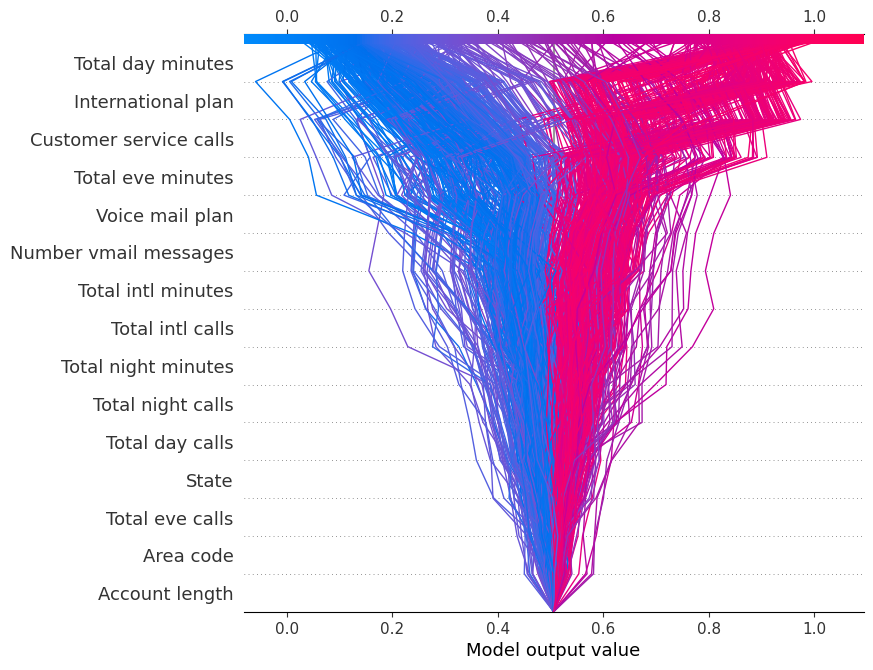

In [435]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.columns)

Epoch 1/20


Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5513 - loss: 7.3181 - val_accuracy: 1.0000 - val_loss: 2.8662e-07
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4834 - loss: 5.7324 - val_accuracy: 1.0000 - val_loss: 0.1711
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5277 - loss: 5.0271 - val_accuracy: 1.0000 - val_loss: 0.2266
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5307 - loss: 3.8616 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5266 - loss: 4.0285 - val_accuracy: 0.9935 - val_loss: 0.4031
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5822 - loss: 2.9671 - val_accuracy: 0.0000e+00 - val_loss: 3.6907
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5597 - loss: 2.7181 - val_accuracy: 0.0000e+00 - val_loss: 1.4489
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5143 - loss: 2.9999 - val_accuracy: 0.0000e+00 - val

PermutationExplainer explainer: 765it [01:41,  6.78it/s]                         


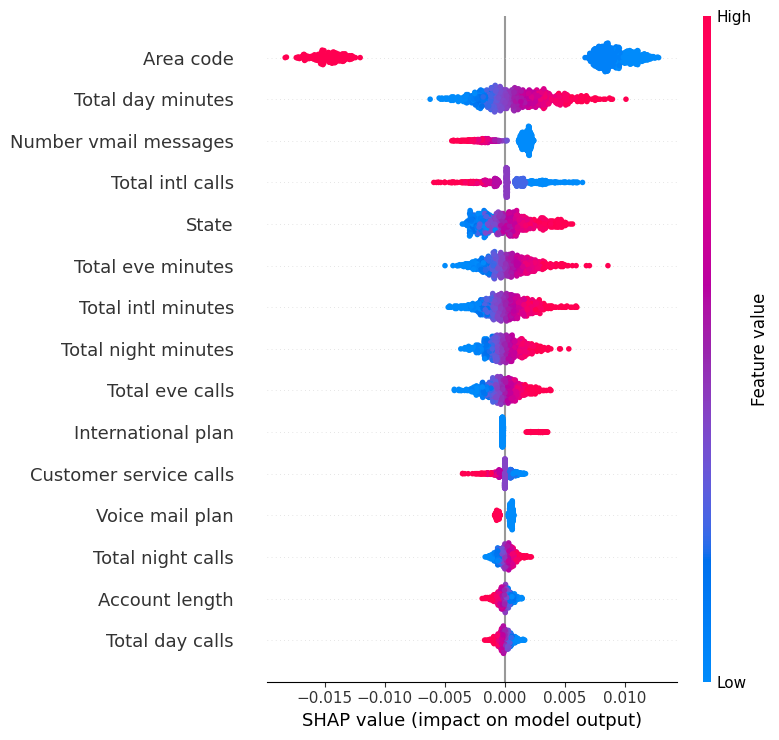

In [436]:
# Build Neural Network (without re-scaling the data)
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_balanced.shape[1],)),  # Use X_train_balanced
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile and train
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train_balanced, y_train_balanced, epochs=20, batch_size=32, validation_split=0.2)

# Use SHAP Explainer compatible with TF2.x
explainer_nn = shap.Explainer(nn_model, X_train_balanced[:100])  # Small background dataset

# Take a small sample for SHAP (to save time)
X_sample_nn = X_train_balanced[:SAMPLE_SIZE]

# Calculate SHAP values
shap_values_nn = explainer_nn(X_sample_nn)

# Summary Plot (SHAP Feature Importance)
shap.summary_plot(shap_values_nn, X_sample_nn, feature_names=X_train_balanced.columns)


---
* more complex models based on non-linear relationships between features through hidden layers and weights. like neural networks here , gave same important featueres as the RFC , so confirms feature importance*

### Based on both SHAP and Mutual Information analyses, here's the logical feature selection:

#### Definitely Include (High Importance in Both):

1. Total day minutes
2. Customer service calls
3. International plan

#### Important in SHAP and Moderate/Low in MI:

1. Total intl minutes
2. Total intl calls
3. Total eve minutes

#### Important in MI but Lower in SHAP:

1. Number vmail messages
2. Voice mail plan
   
##### Selected Features:
- Total day minutes
- International plan
- Customer service calls
- Total international minutes
- Voice mail plan
- Number of voicemail messages

In [443]:
# Encode 'Churn' as 0/1
y_train_encoded = y_train_final.astype(int)  # Convert True/False to 1/0 for training target
y_test_encoded = y_test.astype(int)  # Convert True/False to 1/0 for test target



In [444]:
# Select top features that explain most of the variation based on SHAP values
selected_features = [
    'Total day minutes',
    'Customer service calls',
    'International plan',
    'Total intl minutes',
    'Total intl calls',
    'Total eve minutes',
    'Number vmail messages',
    'Voice mail plan',
]

# Create new dataframes with selected features based on undersampled data
# Use X_train_final (after NearMiss) for features
df_train_selected = pd.DataFrame(X_train_final, columns=X_train.columns)[selected_features]
df_train_selected['Churn'] = y_train_encoded  # Add encoded 'Churn' as the target variable to the training data

# For testing data, use df_test_clean and add 'Churn' from y_test_encoded (encoded)
df_test_selected = df_test_clean[selected_features]
df_test_selected['Churn'] = y_test_encoded  # Add encoded 'Churn' from the test target variable

# Print the shape of the selected data
print("Training shape:", df_train_selected.shape)
print("Testing shape:", df_test_selected.shape)


Training shape: (764, 9)
Testing shape: (647, 9)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [442]:
# Save cleaned datasets
df_train_selected.to_csv('cleaned_train.csv', index=False)
df_test_selected.to_csv('cleaned_test.csv', index=False)